In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
import tensorflow as tf
import keras
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import json
import datetime
import os
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_77340\2216171963.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


##### DATAFRAME

2020.01.01 ~ 2023.12.31 과실류의 거래량과 가격으로 구성

In [14]:
df = pd.read_csv('./data/traintest1.csv')
feature = df.columns[2:]
df

,date,요일,포도_거래량(kg),포도_가격(원/kg),망고_거래량(kg),망고_가격(원/kg),체리_거래량(kg),체리_가격(원/kg),레몬_거래량(kg),레몬_가격(원/kg),블루베리_거래량(kg),블루베리_가격(원/kg),수박_거래량(kg),수박_가격(원/kg),딸기_거래량(kg),딸기_가격(원/kg),메론_거래량(kg),메론_가격(원/kg)
0,2020-01-01,수요일,80.00,4937.500000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,152.00,10838.815789,0.0,0.000000
1,2020-01-02,목요일,7307.40,4077.209404,1036.0,6583.976834,2040.0,13120.588235,366.60,3447.190398,332.50,11254.135338,10610.0,2474.674835,40206.50,14548.951040,4042.0,2871.328550
2,2020-01-03,금요일,123328.20,5584.640253,7548.0,7371.886592,6051.0,13410.180136,11814.56,3245.099860,3529.45,11360.721926,78991.0,2457.878492,439280.80,12512.915015,44461.5,4096.332243
3,2020-01-04,토요일,73000.50,6563.447237,3623.0,6660.024841,18010.4,10540.025208,6472.80,3461.097207,1561.60,14054.399334,47803.5,2290.785403,431721.15,11778.870505,21447.4,4909.190391
4,2020-01-06,월요일,115448.70,6560.837151,3318.0,6565.355636,15627.0,10445.964037,14927.50,3277.203149,3045.65,11810.434554,86253.0,2299.465178,377029.78,11280.019419,44633.0,3783.504358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2023-12-26,화요일,182761.50,6943.016275,5346.5,8725.833910,1913.5,20614.962111,6693.40,4337.477814,27727.00,1644.246402,40515.0,2640.181167,321811.48,18167.585721,23258.0,5365.283773
1240,2023-12-27,수요일,195870.15,7110.740508,34533.0,8283.285553,5177.0,21218.736720,19623.10,4514.194546,1768.50,24149.844501,24135.0,2511.626269,254549.41,18134.920486,23885.0,4841.867281
1241,2023-12-28,목요일,221650.70,7485.121500,8025.0,8444.797508,6629.0,20222.378941,8713.50,4286.658633,2293.00,22921.238552,35342.0,2770.462905,269283.33,18819.964496,18318.0,5615.971722
1242,2023-12-29,금요일,240271.70,7204.242863,9107.5,7457.827066,7865.0,19862.110617,38718.80,4153.695879,2055.00,21409.245742,31564.4,2998.938044,394438.87,19087.589796,21400.2,4885.295465


##### 1. 품목별 가격

계절 패턴이 뚜렷하고 품목별로 확연히 다른 분포를 보이는 것을 확인할 수 있음

In [15]:
feature_price = []
for i in range(1,9):
  feature_price.append(feature[2*i-1])

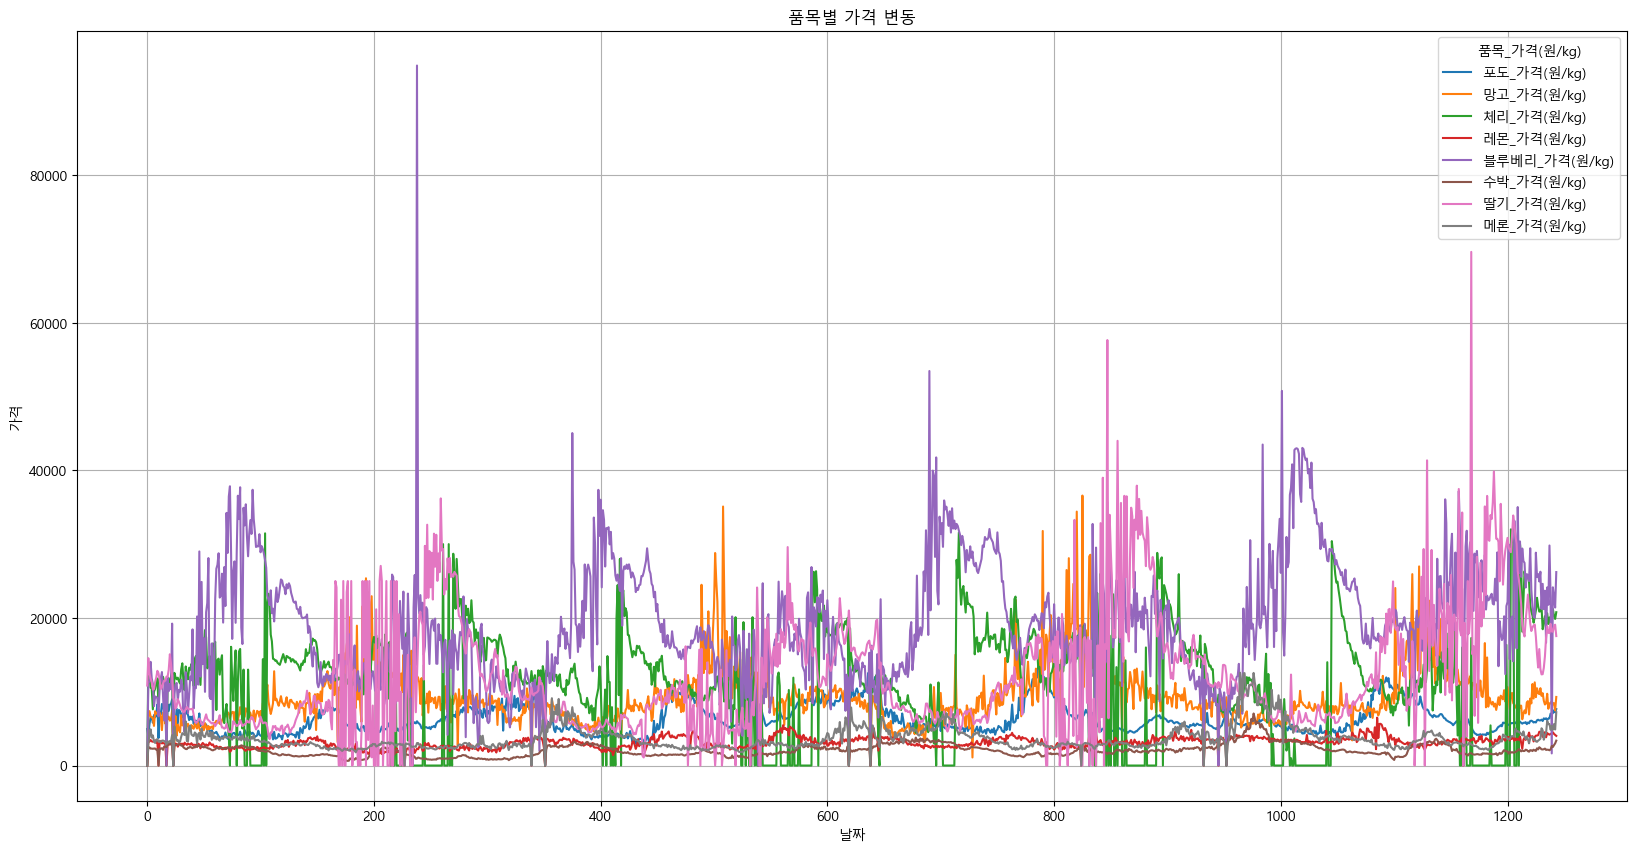

In [114]:
# colors = {
#     '포도_가격(원/kg)': 'purple',
#     '망고_가격(원/kg)': 'orange',
#     '체리_가격(원/kg)': 'pink',
#     '레몬_가격(원/kg)': 'yellow',
#     '블루베리_가격(원/kg)': 'blue',
#     '수박_가격(원/kg)': 'green',
#     '딸기_가격(원/kg)': 'red',
#     '메론_가격(원/kg)': 'lightgreen'
# }

df[feature_price[:]] = df[feature_price[:]].apply(pd.to_numeric, errors='coerce')
df[feature_price[:]].plot(figsize=(20,10))
# df[feature_price[:]].plot(figsize=(20,10), color=[colors[fruit] for fruit in feature_price])

plt.title('품목별 가격 변동')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend(title='품목_가격(원/kg)')
plt.grid(True)

plt.show()

##### 2. 품목별 거래량

계절에 따른 거래량 차이를 볼수 있음 (딸기, 수박, 메론)

가격의 계절패턴보다 거래량의 계절패턴이 더 큼

In [17]:
feature_qty = []
for i in range(1,8):
  feature_qty.append(feature[2*i])

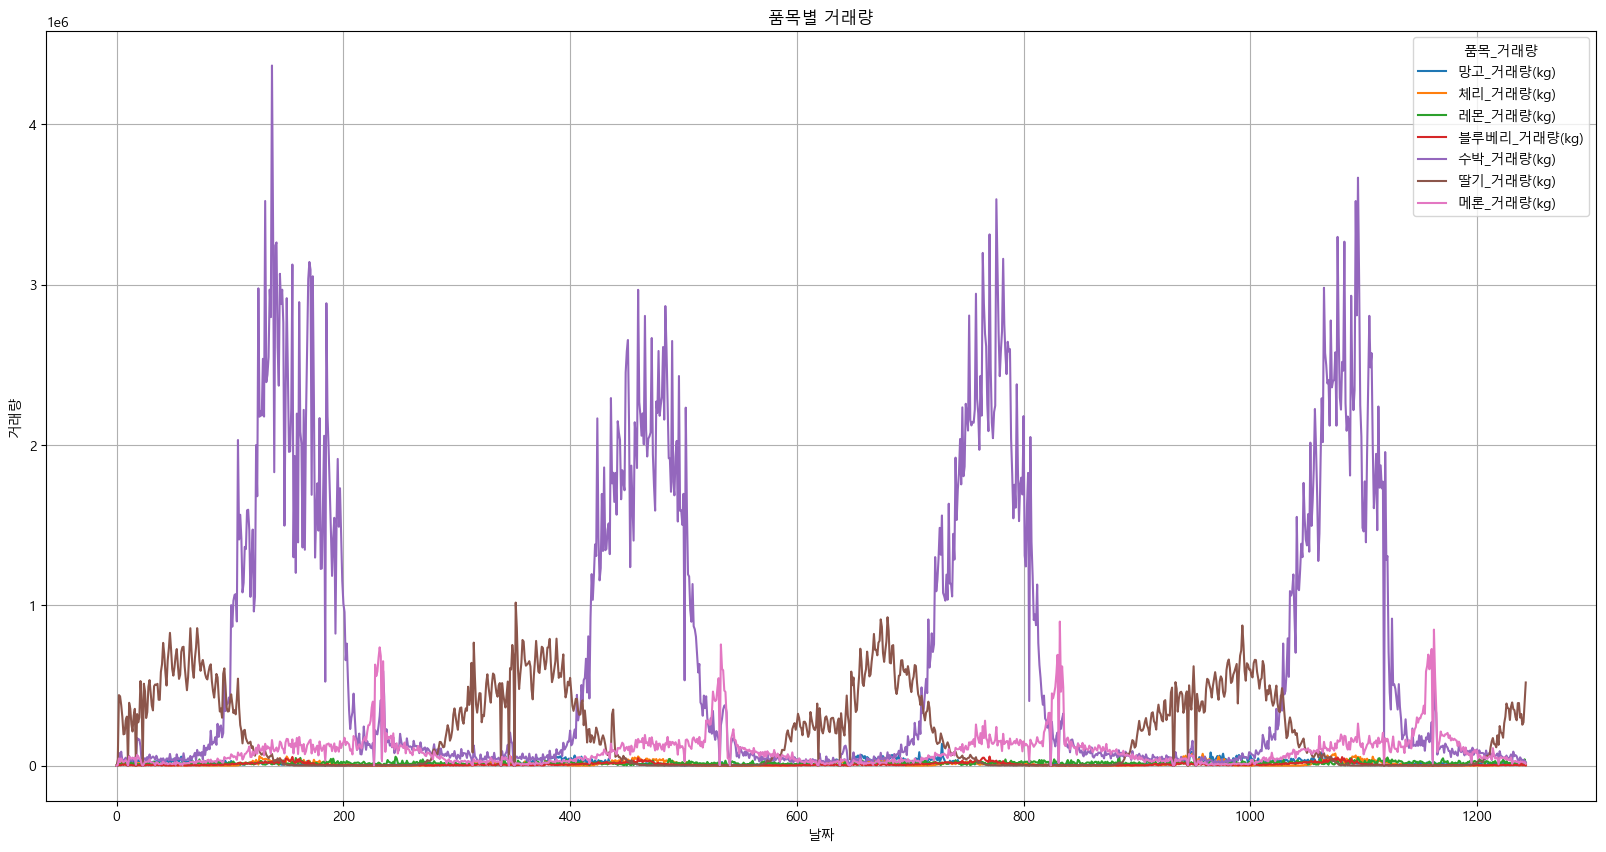

In [116]:
df[feature_qty[:]] = df[feature_qty[:]].apply(pd.to_numeric, errors='coerce')
df[feature_qty[:]].plot(figsize=(20,10))

plt.title('품목별 거래량')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.legend(title='품목_거래량')
plt.grid(True)

plt.show()

##### 3. 과실류 가격 분포

가격의 특이값이 많이 있음 -> 포도와 딸기의 특이값은 차이가 큼

Text(0, 0.5, '가격(원/kg)')

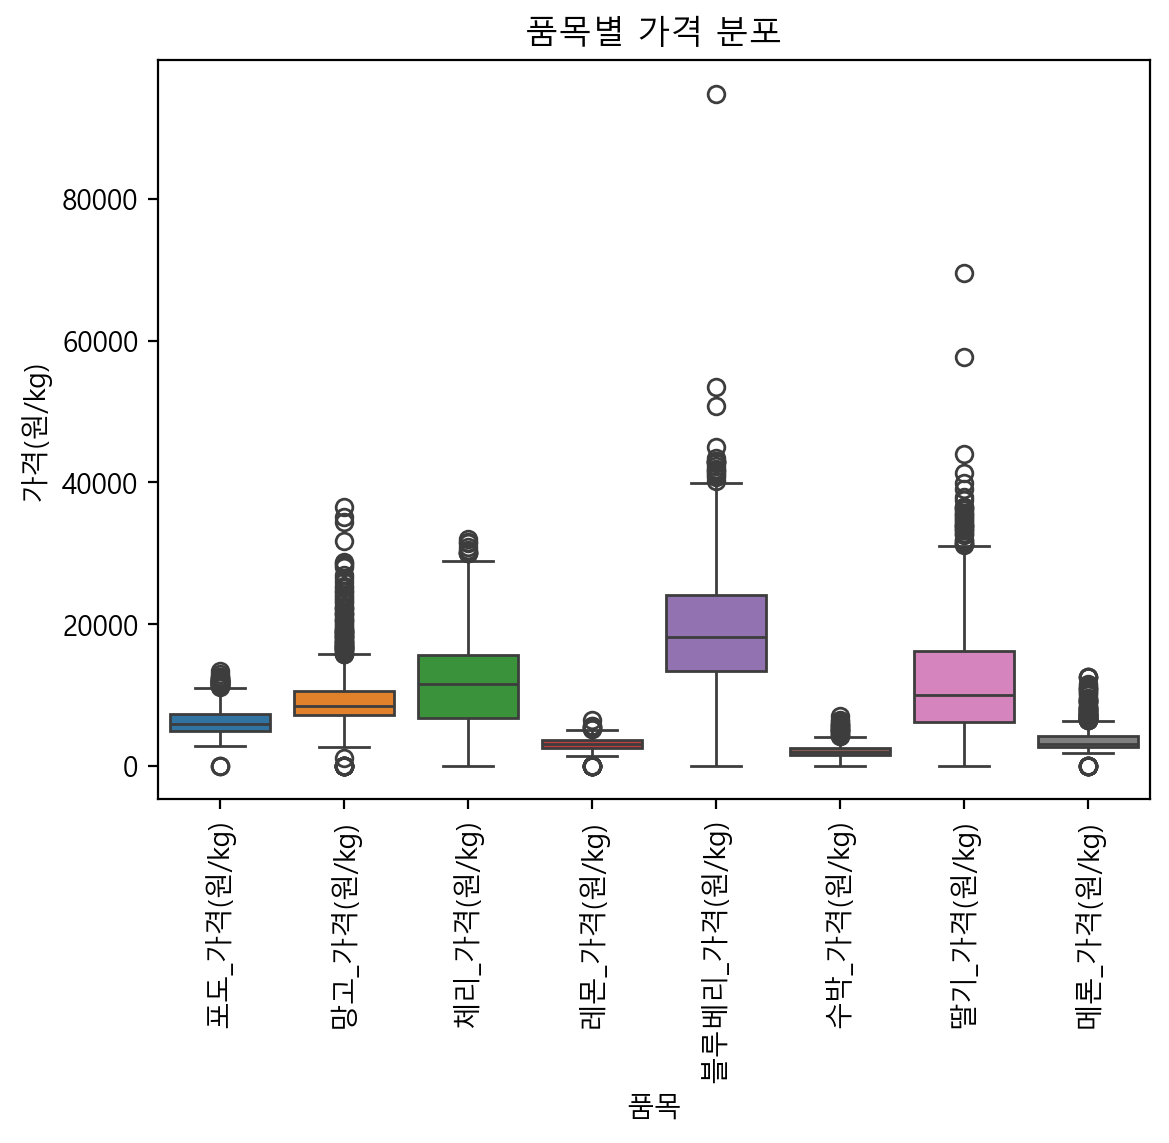

In [117]:
fig = plt.figure(dpi=200)
plt.xticks(rotation=90)
sns.boxplot(data=df[feature_price[:]])

plt.title('품목별 가격 분포')
plt.xlabel('품목')
plt.ylabel('가격(원/kg)')

##### 4. 월별 품목 순위

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
numeric_cols = df.select_dtypes(include='number')
df_monthly = numeric_cols.resample('ME').mean()

print(df_monthly.head())

               포도_거래량(kg)  포도_가격(원/kg)    망고_거래량(kg)  망고_가격(원/kg)  \
date                                                                
2020-01-31   62369.585714  6537.868295  13054.428571  5905.695451   
2020-02-29   48260.604000  6360.463177  24568.780000  5281.908261   
2020-03-31  117748.976923  4257.320246  23819.038462  6117.446619   
2020-04-30  166350.046154  4233.094666  18046.346154  7018.787000   
2020-05-31  142457.269231  4116.429812  12012.080769  8745.579005   

              체리_거래량(kg)   체리_가격(원/kg)    레몬_거래량(kg)  레몬_가격(원/kg)  \
date                                                                
2020-01-31   9355.610714  10062.455954   9034.481429  2658.544040   
2020-02-29   4536.680000  13338.011896   9963.735200  2863.363906   
2020-03-31   2264.153846  11256.707049  14866.033846  2489.809875   
2020-04-30    388.269231   5200.619284  15633.473077  2302.637157   
2020-05-31  19893.480769  14929.890563  13582.837692  2740.713057   

            블루베리_거래량(kg)  블루베리_가

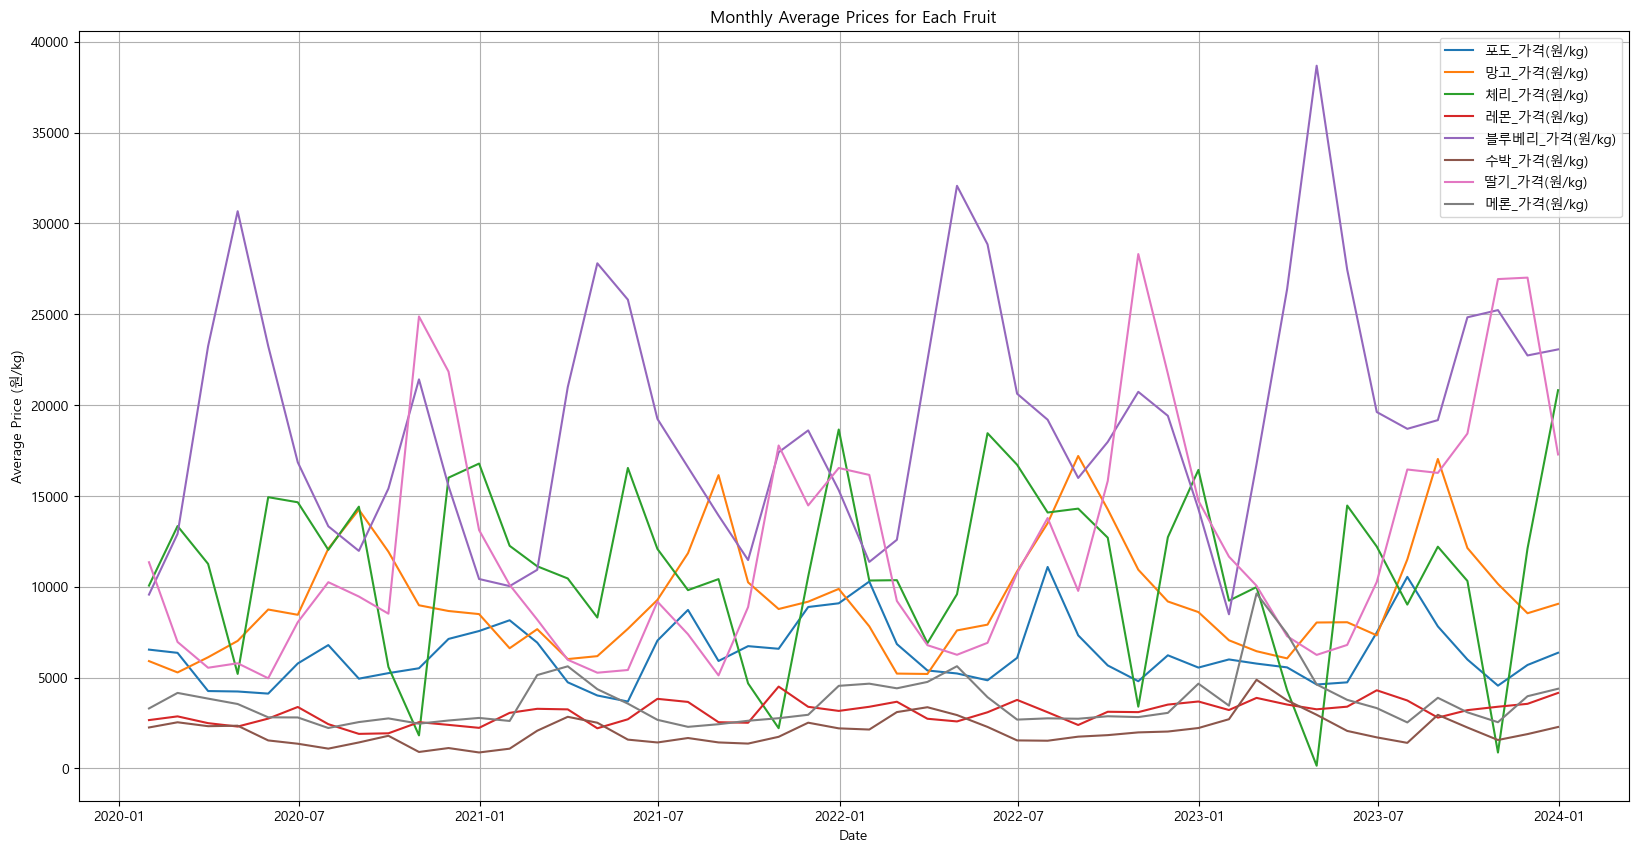

In [119]:
# 각 품목별로 월별 평균 가격을 그래프에 시각화
df_monthly = df_monthly.reset_index()
plt.figure(figsize=(20, 10))

for column in df_monthly.columns:
    if '가격' in column:
        plt.plot(df_monthly['date'], df_monthly[column], label=column)

plt.xlabel('Date')
plt.ylabel('Average Price (원/kg)')
plt.title('Monthly Average Prices for Each Fruit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

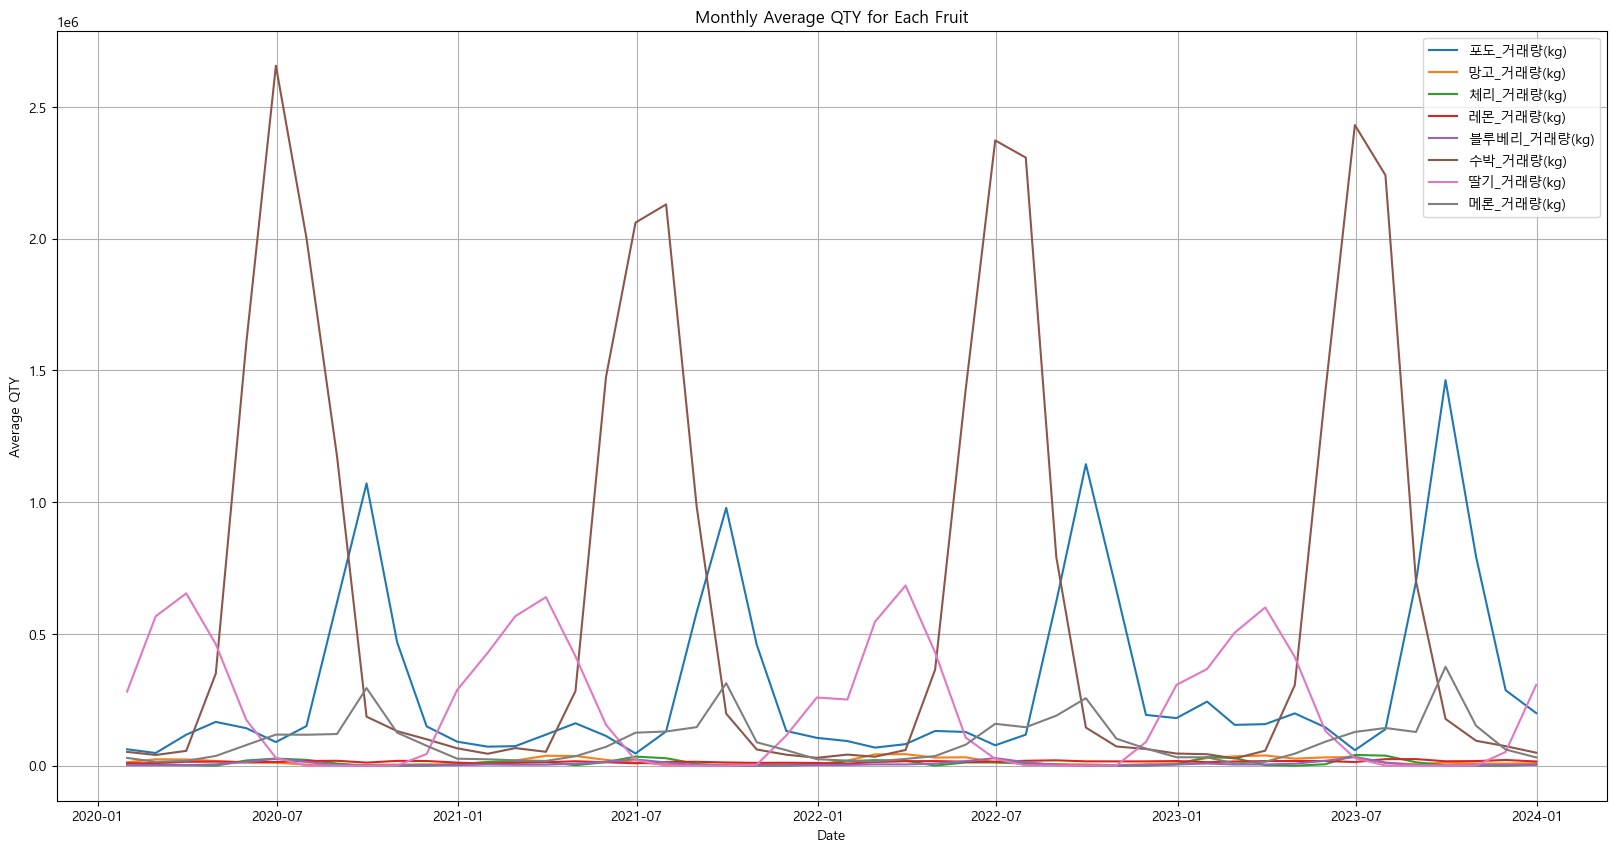

In [120]:
# 각 품목별로 월별 평균 거래량을 그래프에 시각화
df_monthly = df_monthly.reset_index()
plt.figure(figsize=(20, 10))

for column in df_monthly.columns:
    if '거래량' in column:
        plt.plot(df_monthly['date'], df_monthly[column], label=column)

plt.xlabel('Date')
plt.ylabel('Average QTY')
plt.title('Monthly Average QTY for Each Fruit')
plt.legend(loc='best')
plt.grid(True)
plt.show()

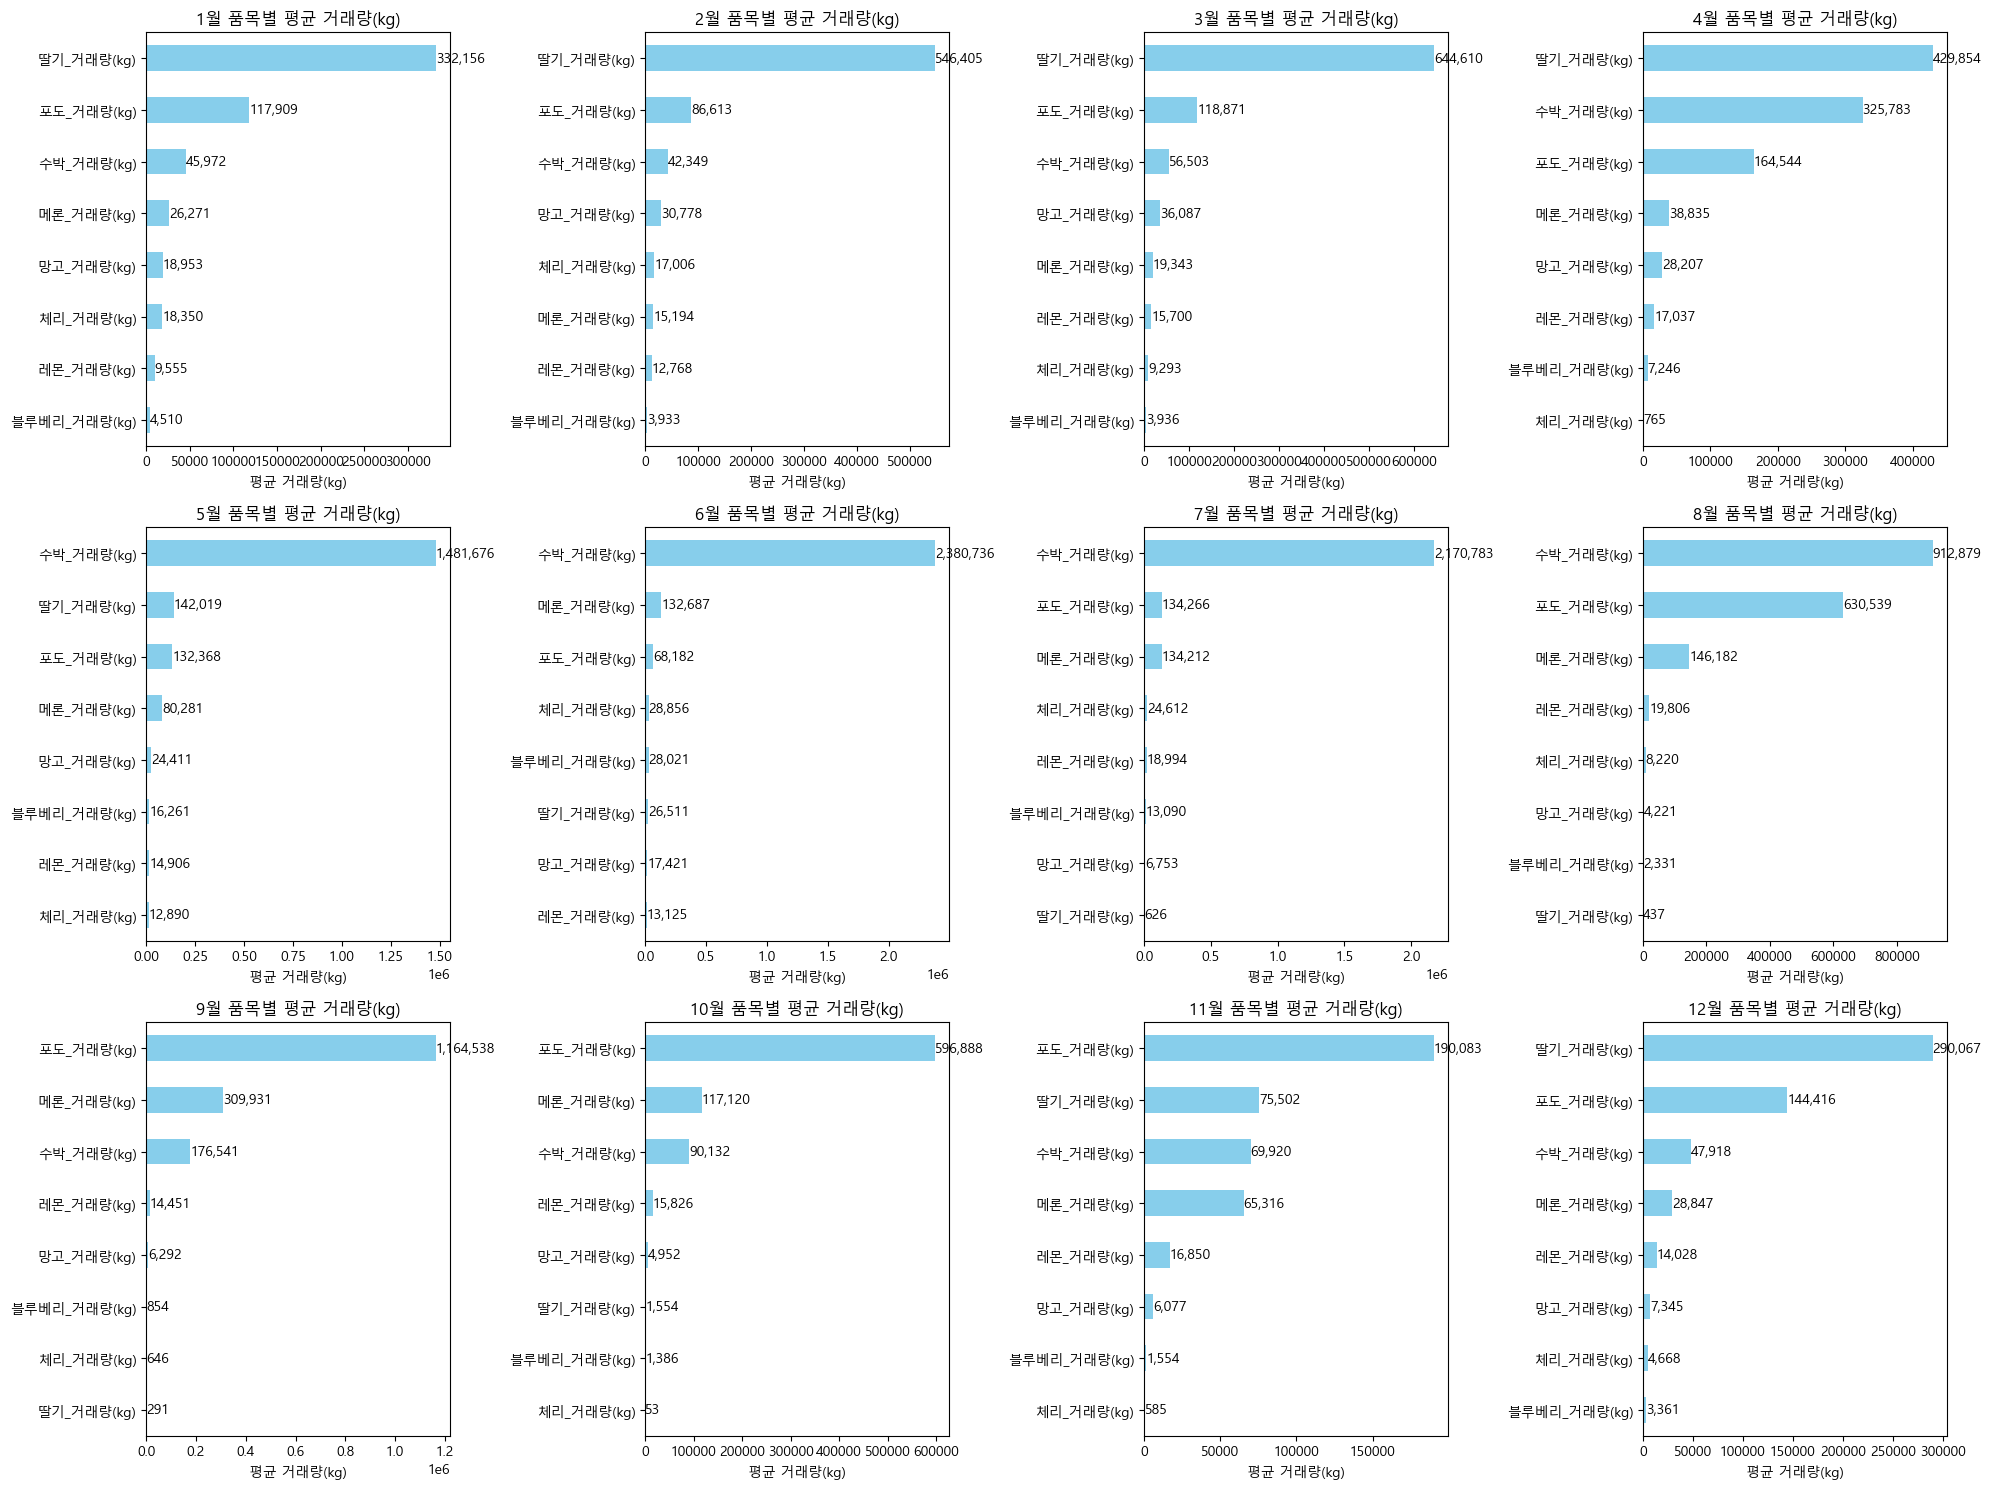

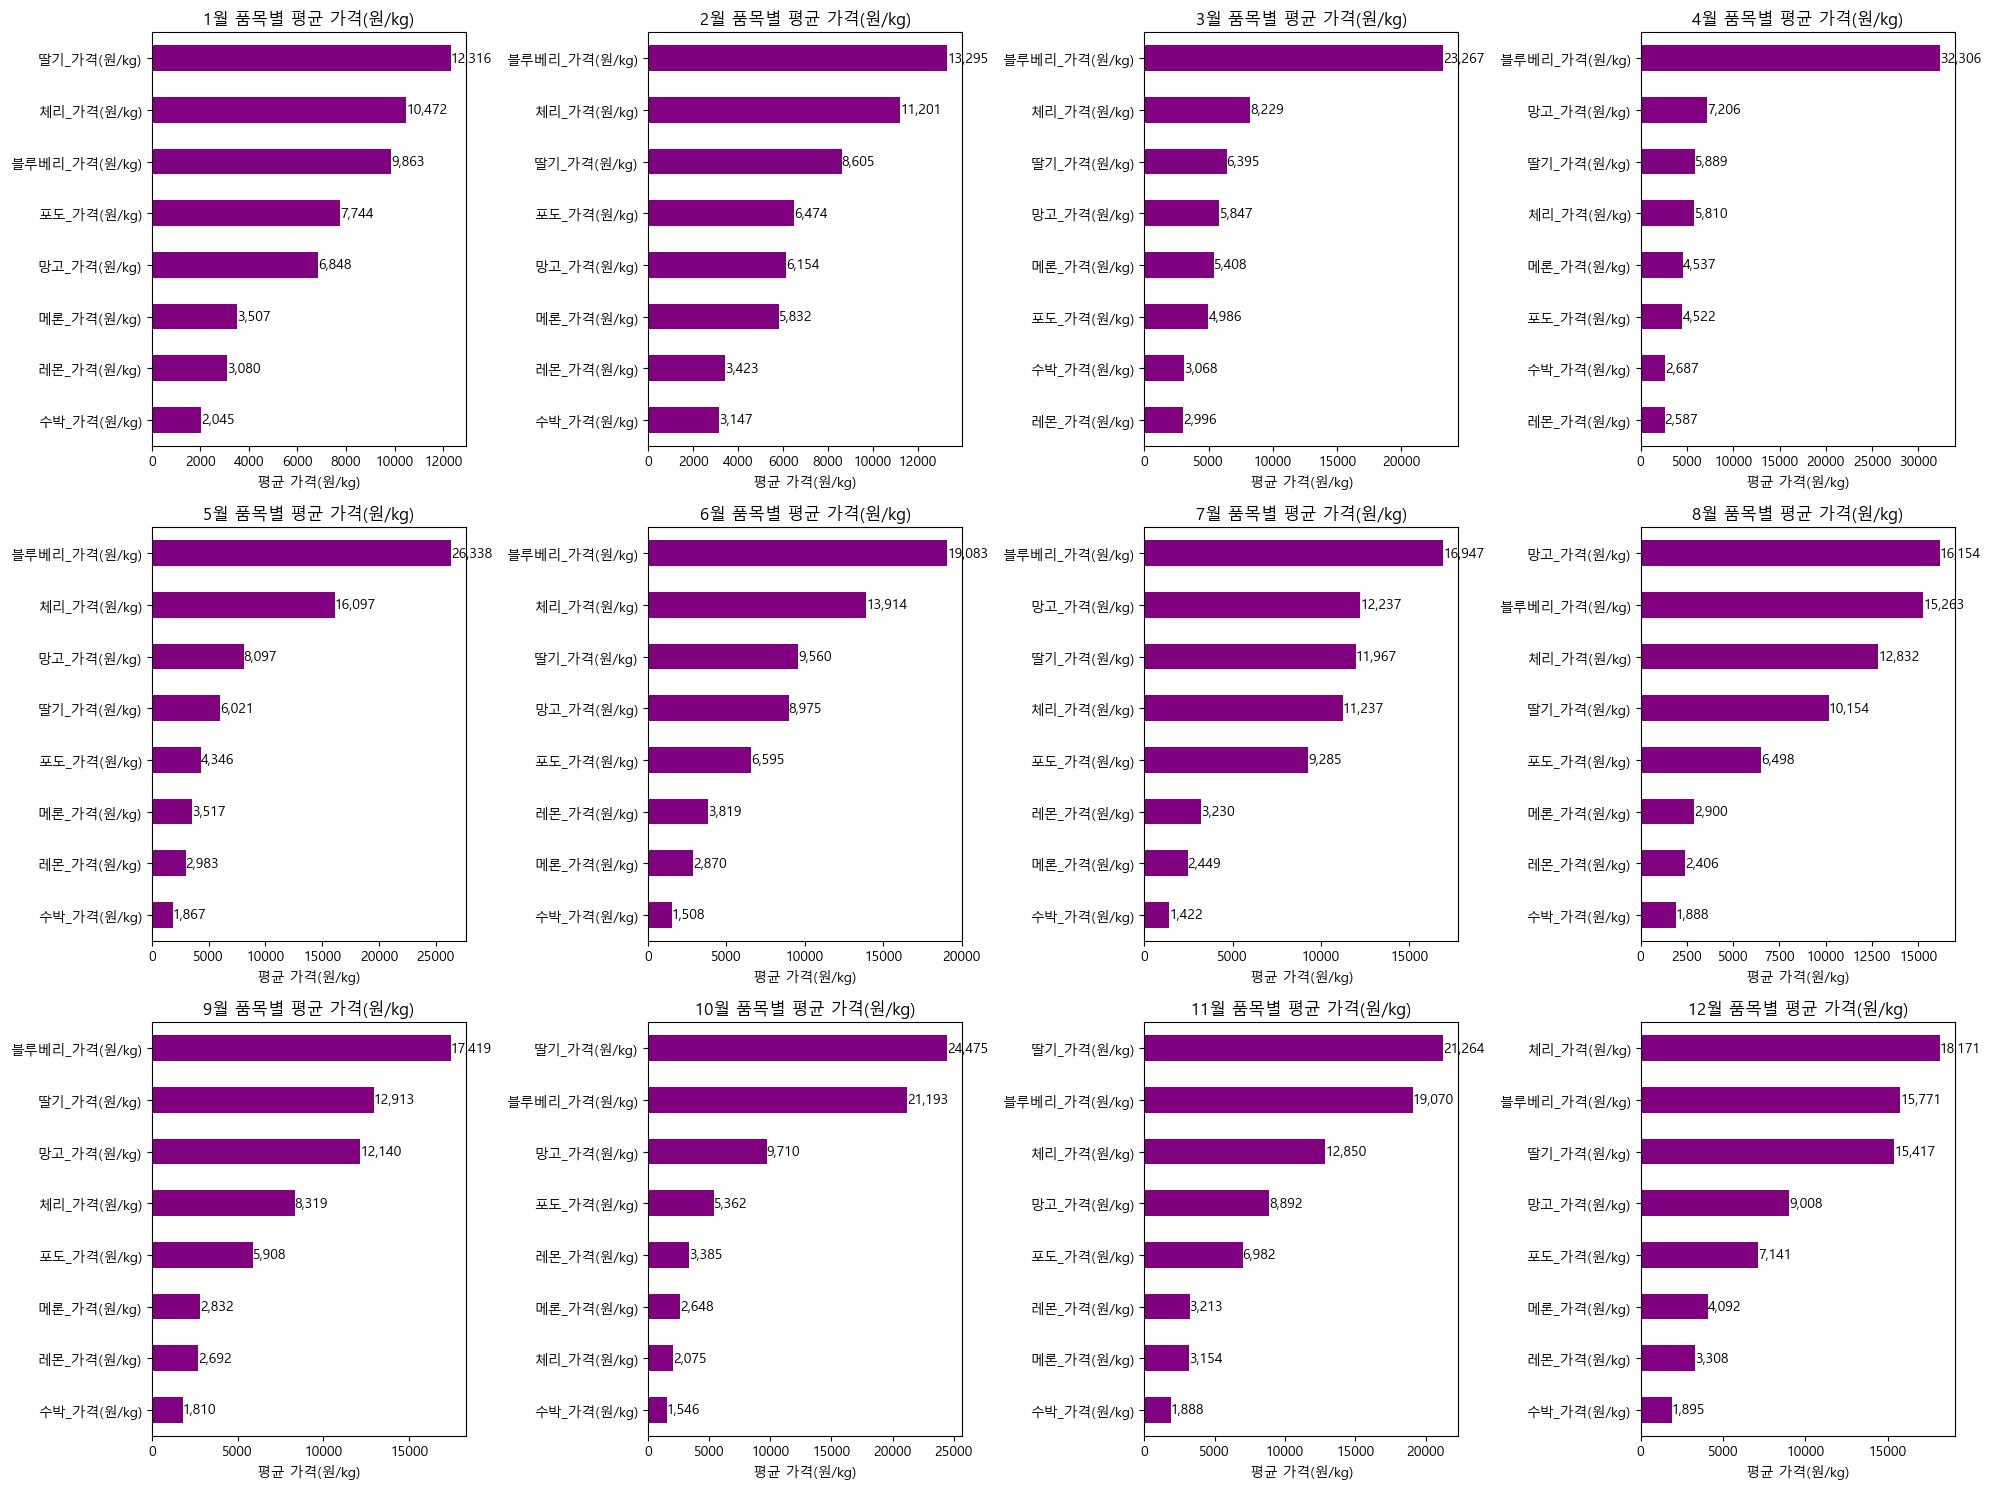

In [143]:
df_monthly['month'] = df_monthly['date'].dt.month
df_monthly_means = df_monthly.groupby('month').mean()

qty_cols = [col for col in df_monthly_means.columns if '거래량' in col]
price_cols = [col for col in df_monthly_means.columns if '가격' in col]

def add_values_on_bars(ax, spacing=5):
    for bar in ax.patches:
        _x = bar.get_width()
        _y = bar.get_y() + bar.get_height() / 2
        value = f'{bar.get_width():,.0f}'
        ax.text(_x + spacing, _y, value, va='center')

# 거래량 기준
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax = df_monthly_means.loc[month, qty_cols].sort_values().plot(kind='barh', ax=axes[month-1], color='skyblue')
    add_values_on_bars(ax)
    axes[month-1].set_title(f'{month}월 품목별 평균 거래량(kg)')
    axes[month-1].set_xlabel('평균 거래량(kg)')

plt.tight_layout()
plt.show()

# 가격 기준
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax = df_monthly_means.loc[month, price_cols].sort_values().plot(kind='barh', ax=axes[month-1], color='purple')
    add_values_on_bars(ax)
    axes[month-1].set_title(f'{month}월 품목별 평균 가격(원/kg)')
    axes[month-1].set_xlabel('평균 가격(원/kg)')

plt.tight_layout()
plt.show()

##### 5. 년도별 품목 순위

* 2020년 품목 순위

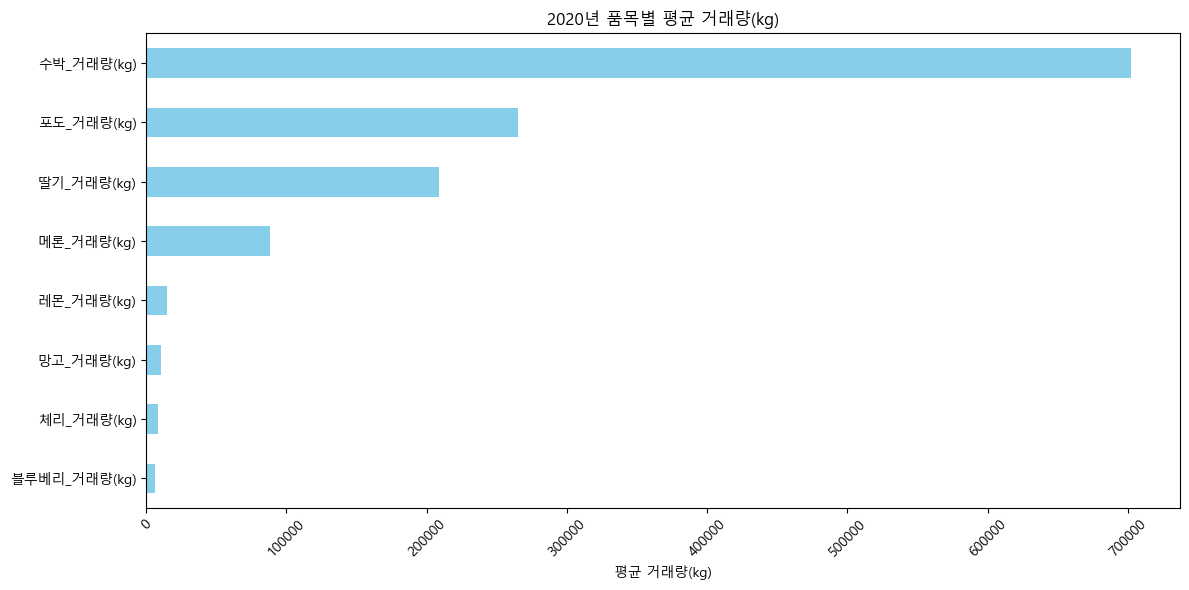

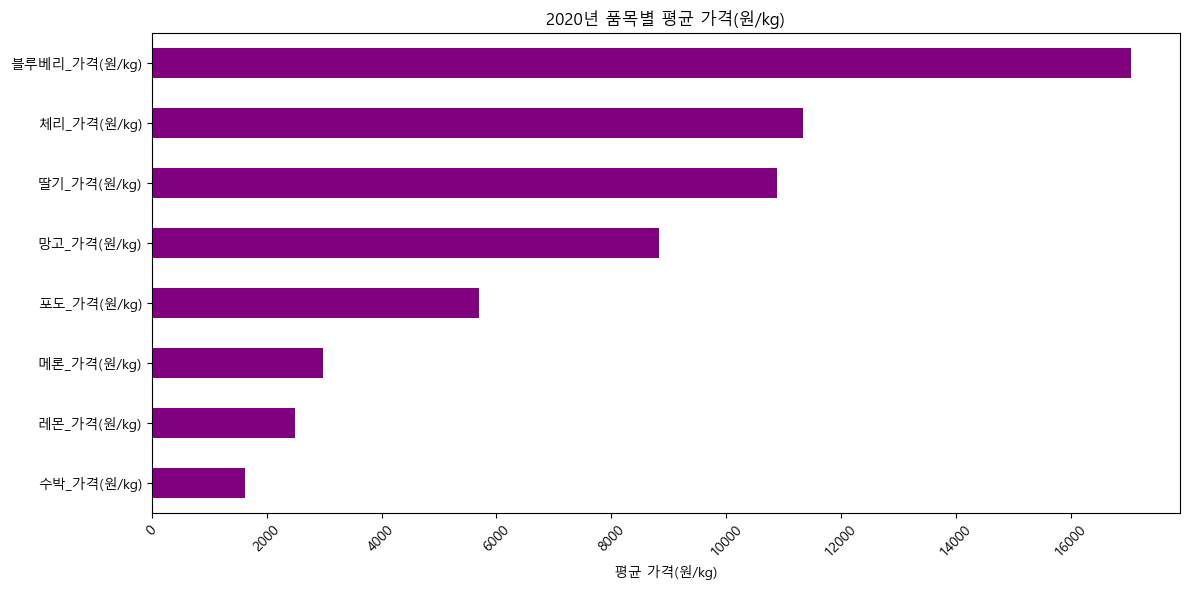

In [131]:
df_2020 = df_monthly[df_monthly['date'].dt.year == 2020]
df_m_mean = df_2020.drop(columns=['date']).mean()

qty_col = [col for col in df_m_mean.index if '거래량' in col]
price_col = [col for col in df_m_mean.index if '가격' in col]

# 거래량 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[qty_col].sort_values().plot(kind='barh', color='skyblue')
plt.title('2020년 품목별 평균 거래량(kg)')
plt.xlabel('평균 거래량(kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 가격 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[price_col].sort_values().plot(kind='barh', color='purple')
plt.title('2020년 품목별 평균 가격(원/kg)')
plt.xlabel('평균 가격(원/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 2021년 품목 순위

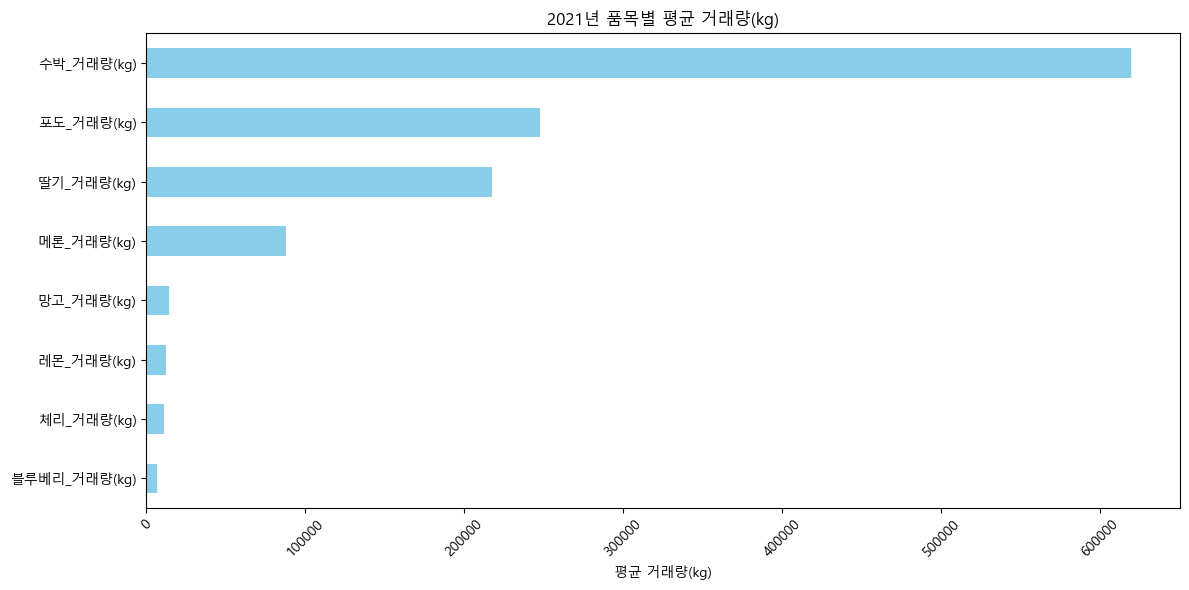

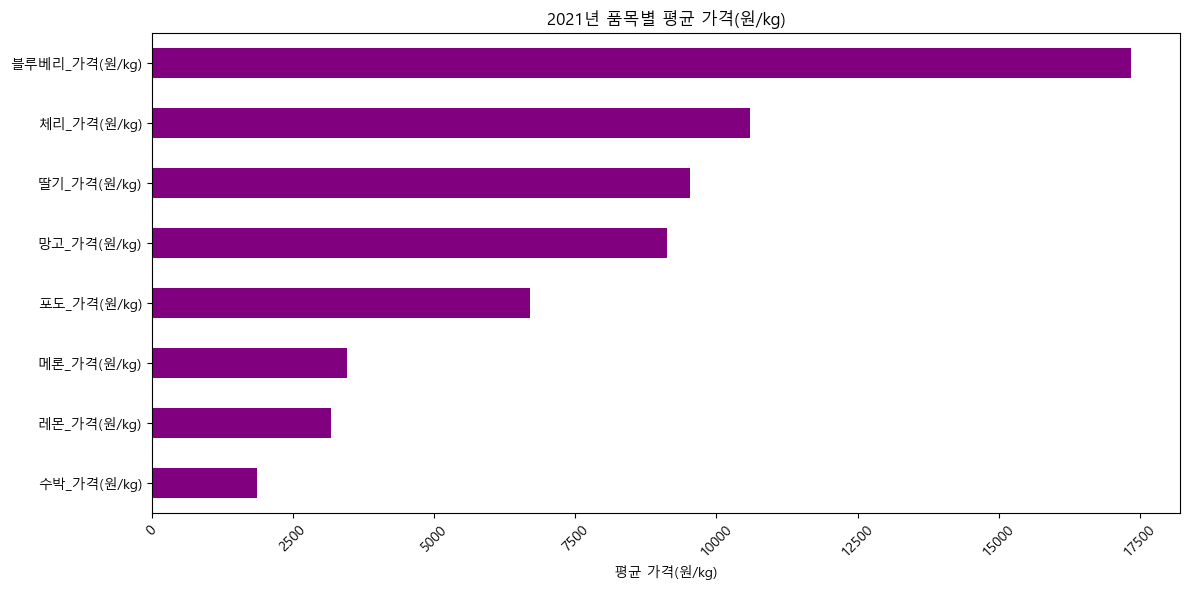

In [132]:
df_2021 = df_monthly[df_monthly['date'].dt.year == 2021]
df_m_mean = df_2021.drop(columns=['date']).mean()

qty_col = [col for col in df_m_mean.index if '거래량' in col]
price_col = [col for col in df_m_mean.index if '가격' in col]

# 거래량 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[qty_col].sort_values().plot(kind='barh', color='skyblue')
plt.title('2021년 품목별 평균 거래량(kg)')
plt.xlabel('평균 거래량(kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 가격 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[price_col].sort_values().plot(kind='barh', color='purple')
plt.title('2021년 품목별 평균 가격(원/kg)')
plt.xlabel('평균 가격(원/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 2022년 품목 순위

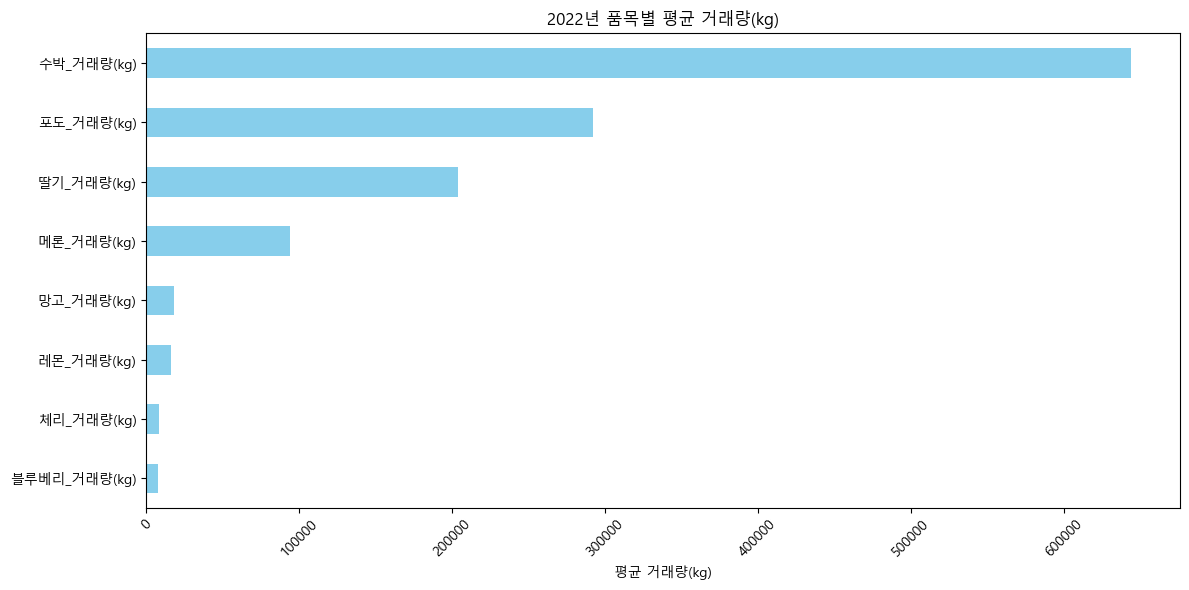

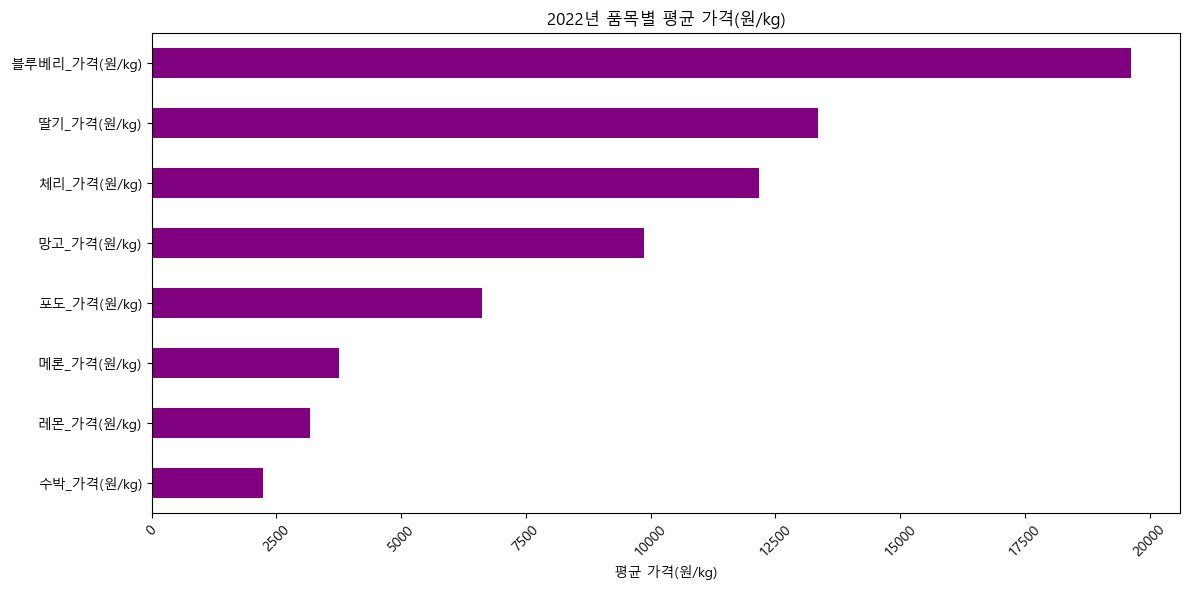

In [134]:
df_2022 = df_monthly[df_monthly['date'].dt.year == 2022]
df_m_mean = df_2022.drop(columns=['date']).mean()

qty_col = [col for col in df_m_mean.index if '거래량' in col]
price_col = [col for col in df_m_mean.index if '가격' in col]

# 거래량 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[qty_col].sort_values().plot(kind='barh', color='skyblue')
plt.title('2022년 품목별 평균 거래량(kg)')
plt.xlabel('평균 거래량(kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 가격 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[price_col].sort_values().plot(kind='barh', color='purple')
plt.title('2022년 품목별 평균 가격(원/kg)')
plt.xlabel('평균 가격(원/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* 2023년 품목 순위

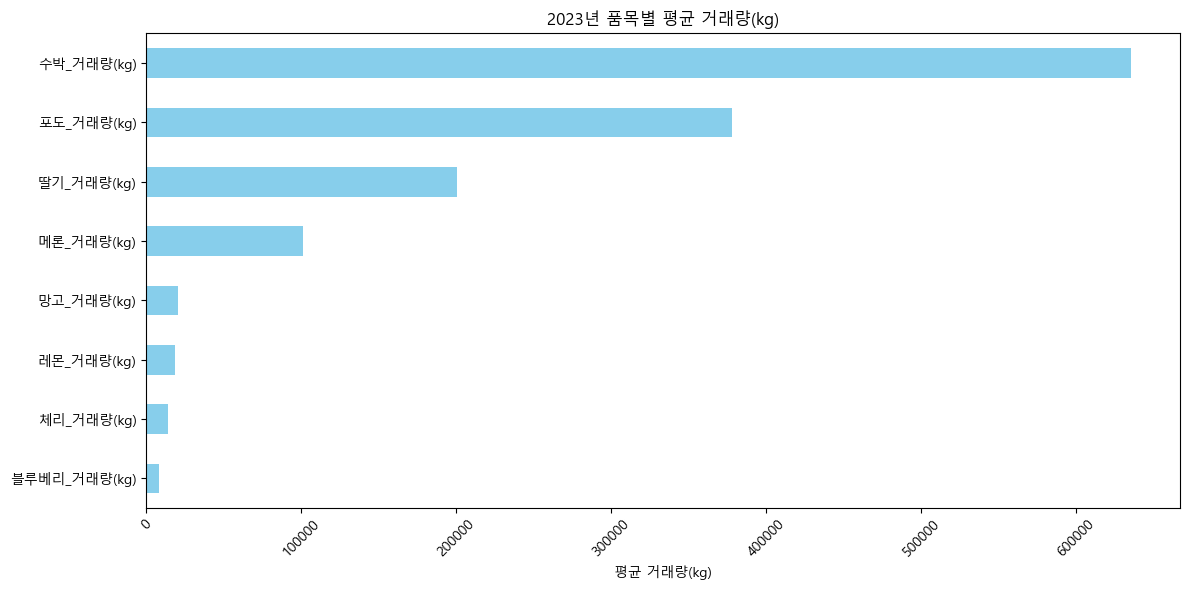

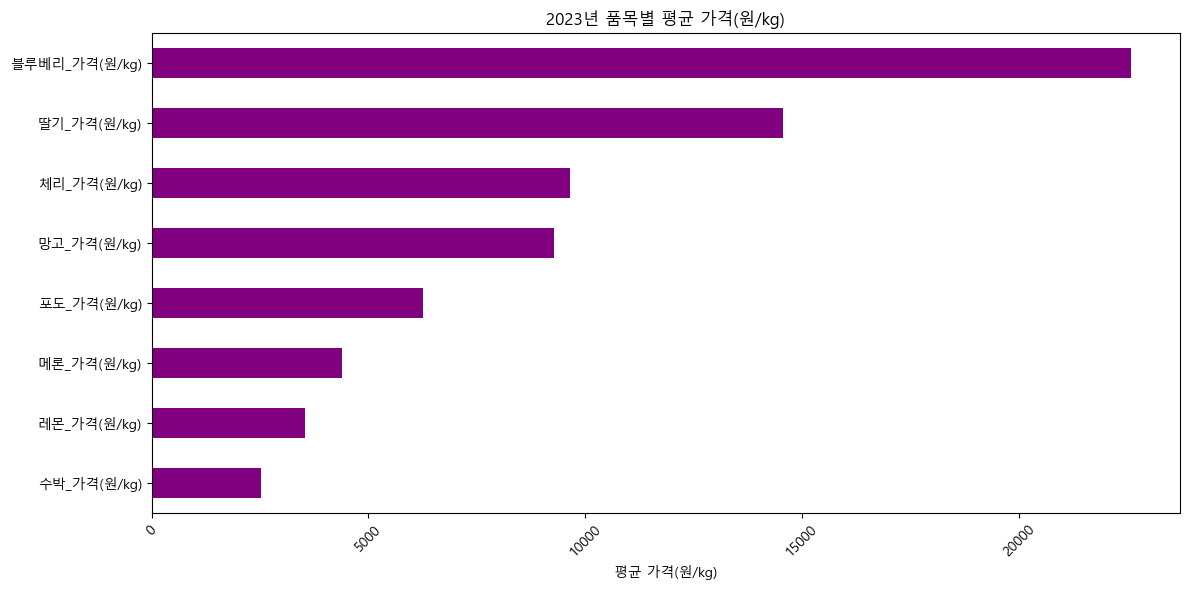

In [136]:
df_2023 = df_monthly[df_monthly['date'].dt.year == 2023]
df_m_mean = df_2023.drop(columns=['date']).mean()

qty_col = [col for col in df_m_mean.index if '거래량' in col]
price_col = [col for col in df_m_mean.index if '가격' in col]

# 거래량 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[qty_col].sort_values().plot(kind='barh', color='skyblue')
plt.title('2023년 품목별 평균 거래량(kg)')
plt.xlabel('평균 거래량(kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 가격 평균 시각화
plt.figure(figsize=(12, 6))
df_m_mean[price_col].sort_values().plot(kind='barh', color='purple')
plt.title('2023년 품목별 평균 가격(원/kg)')
plt.xlabel('평균 가격(원/kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

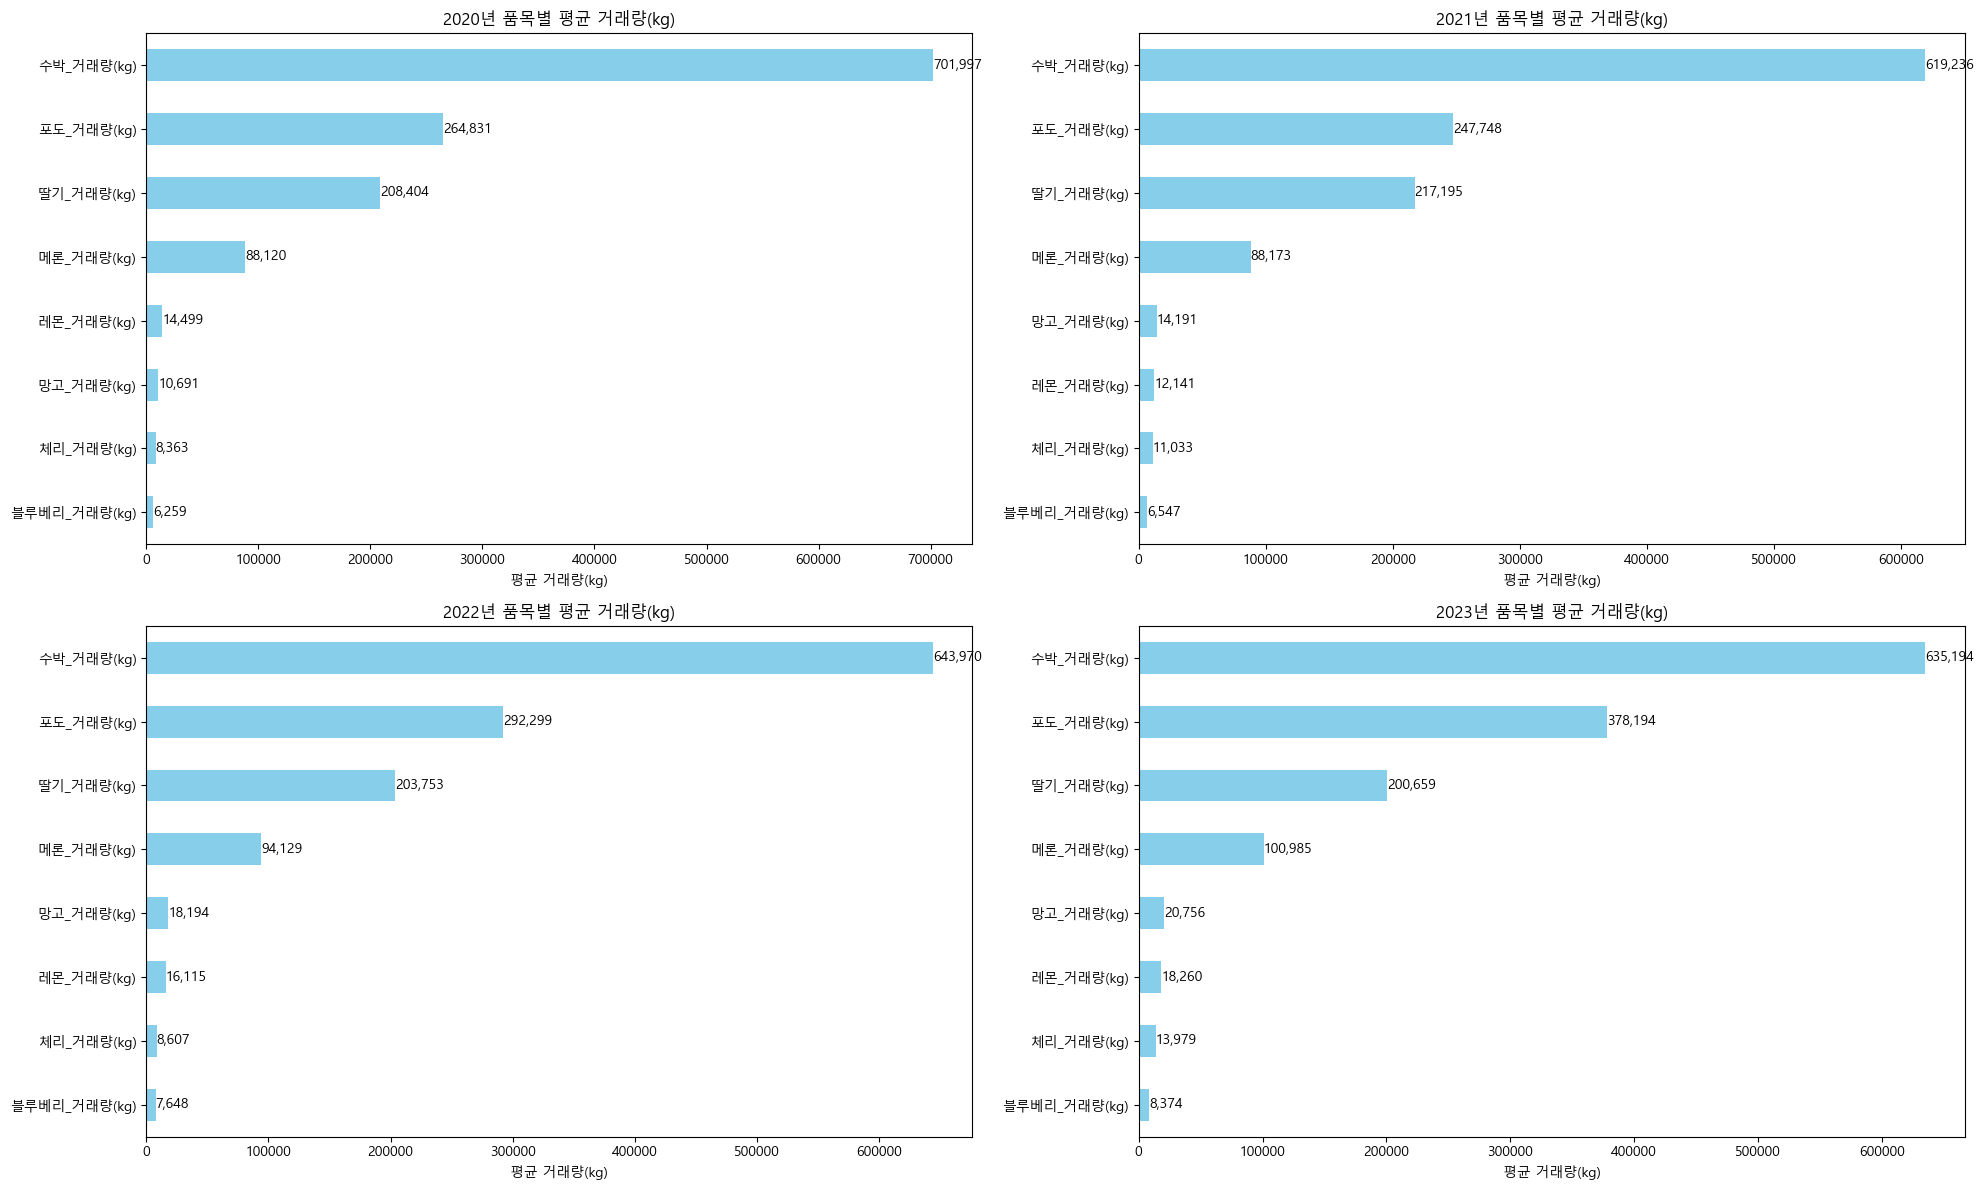

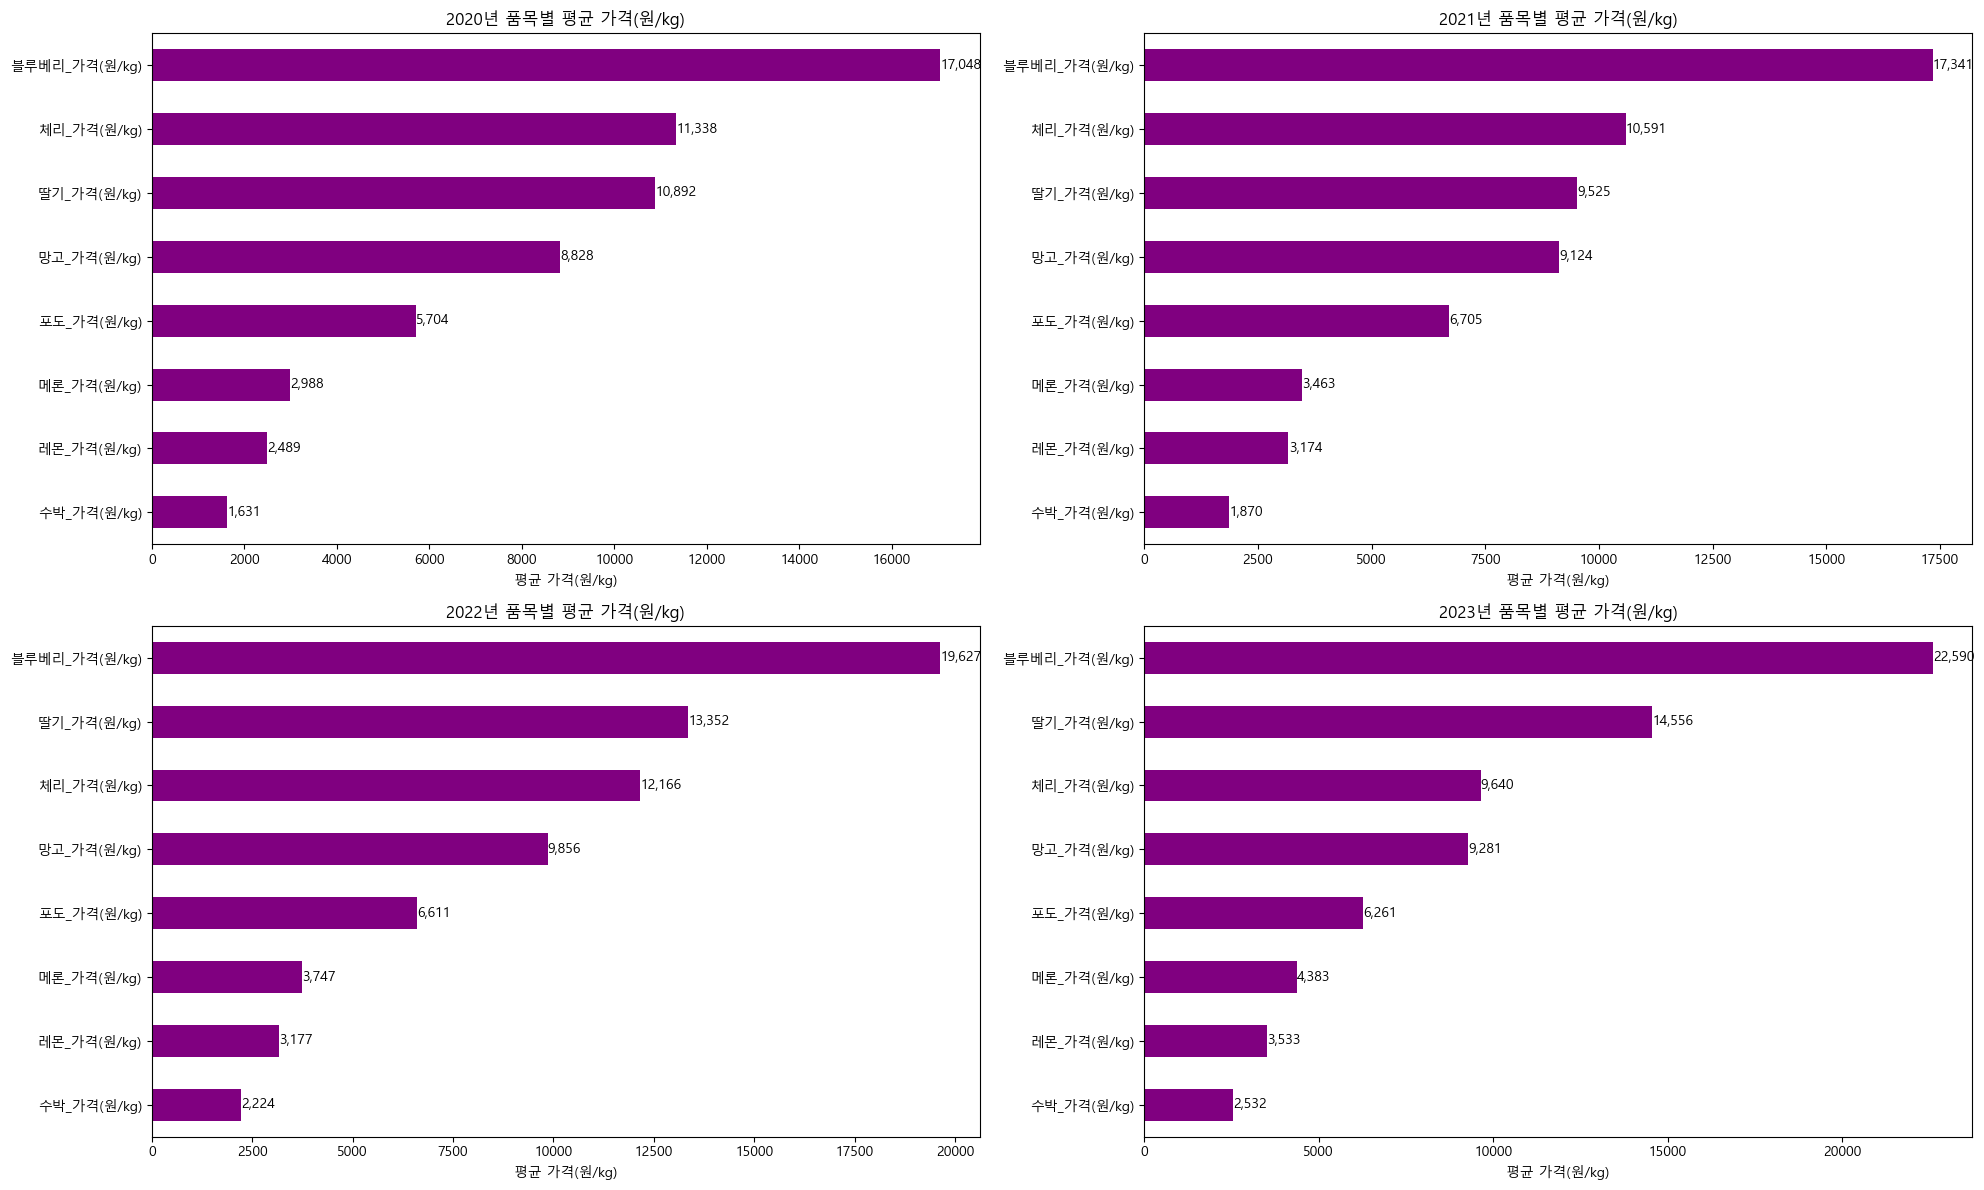

In [140]:
# 연도별 평균 계산
def calculate_yearly_mean(df, year):
    df_year = df[df['date'].dt.year == year]
    return df_year.drop(columns=['date']).mean()

years = [2020, 2021, 2022, 2023]
df_means = {year: calculate_yearly_mean(df_monthly, year) for year in years}

qty_cols = [col for col in df_means[2020].index if '거래량' in col]
price_cols = [col for col in df_means[2020].index if '가격' in col]

def add_values_on_bars(ax, spacing=5):
    for bar in ax.patches:
        _x = bar.get_x() + bar.get_width()
        _y = bar.get_y() + bar.get_height() / 2
        value = f'{bar.get_width():,.0f}'
        ax.text(_x + spacing, _y, value, va='center')

# 거래량 기준
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = df_means[year][qty_cols].sort_values().plot(kind='barh', ax=axes[i], color='skyblue')
    add_values_on_bars(ax)
    axes[i].set_title(f'{year}년 품목별 평균 거래량(kg)')
    axes[i].set_xlabel('평균 거래량(kg)')

plt.tight_layout()
plt.show()

# 가격 기준
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, year in enumerate(years):
    ax = df_means[year][price_cols].sort_values().plot(kind='barh', ax=axes[i], color='purple')
    add_values_on_bars(ax)
    axes[i].set_title(f'{year}년 품목별 평균 가격(원/kg)')
    axes[i].set_xlabel('평균 가격(원/kg)')

plt.tight_layout()
plt.show()

- 품목별 월별 거래량과 가격

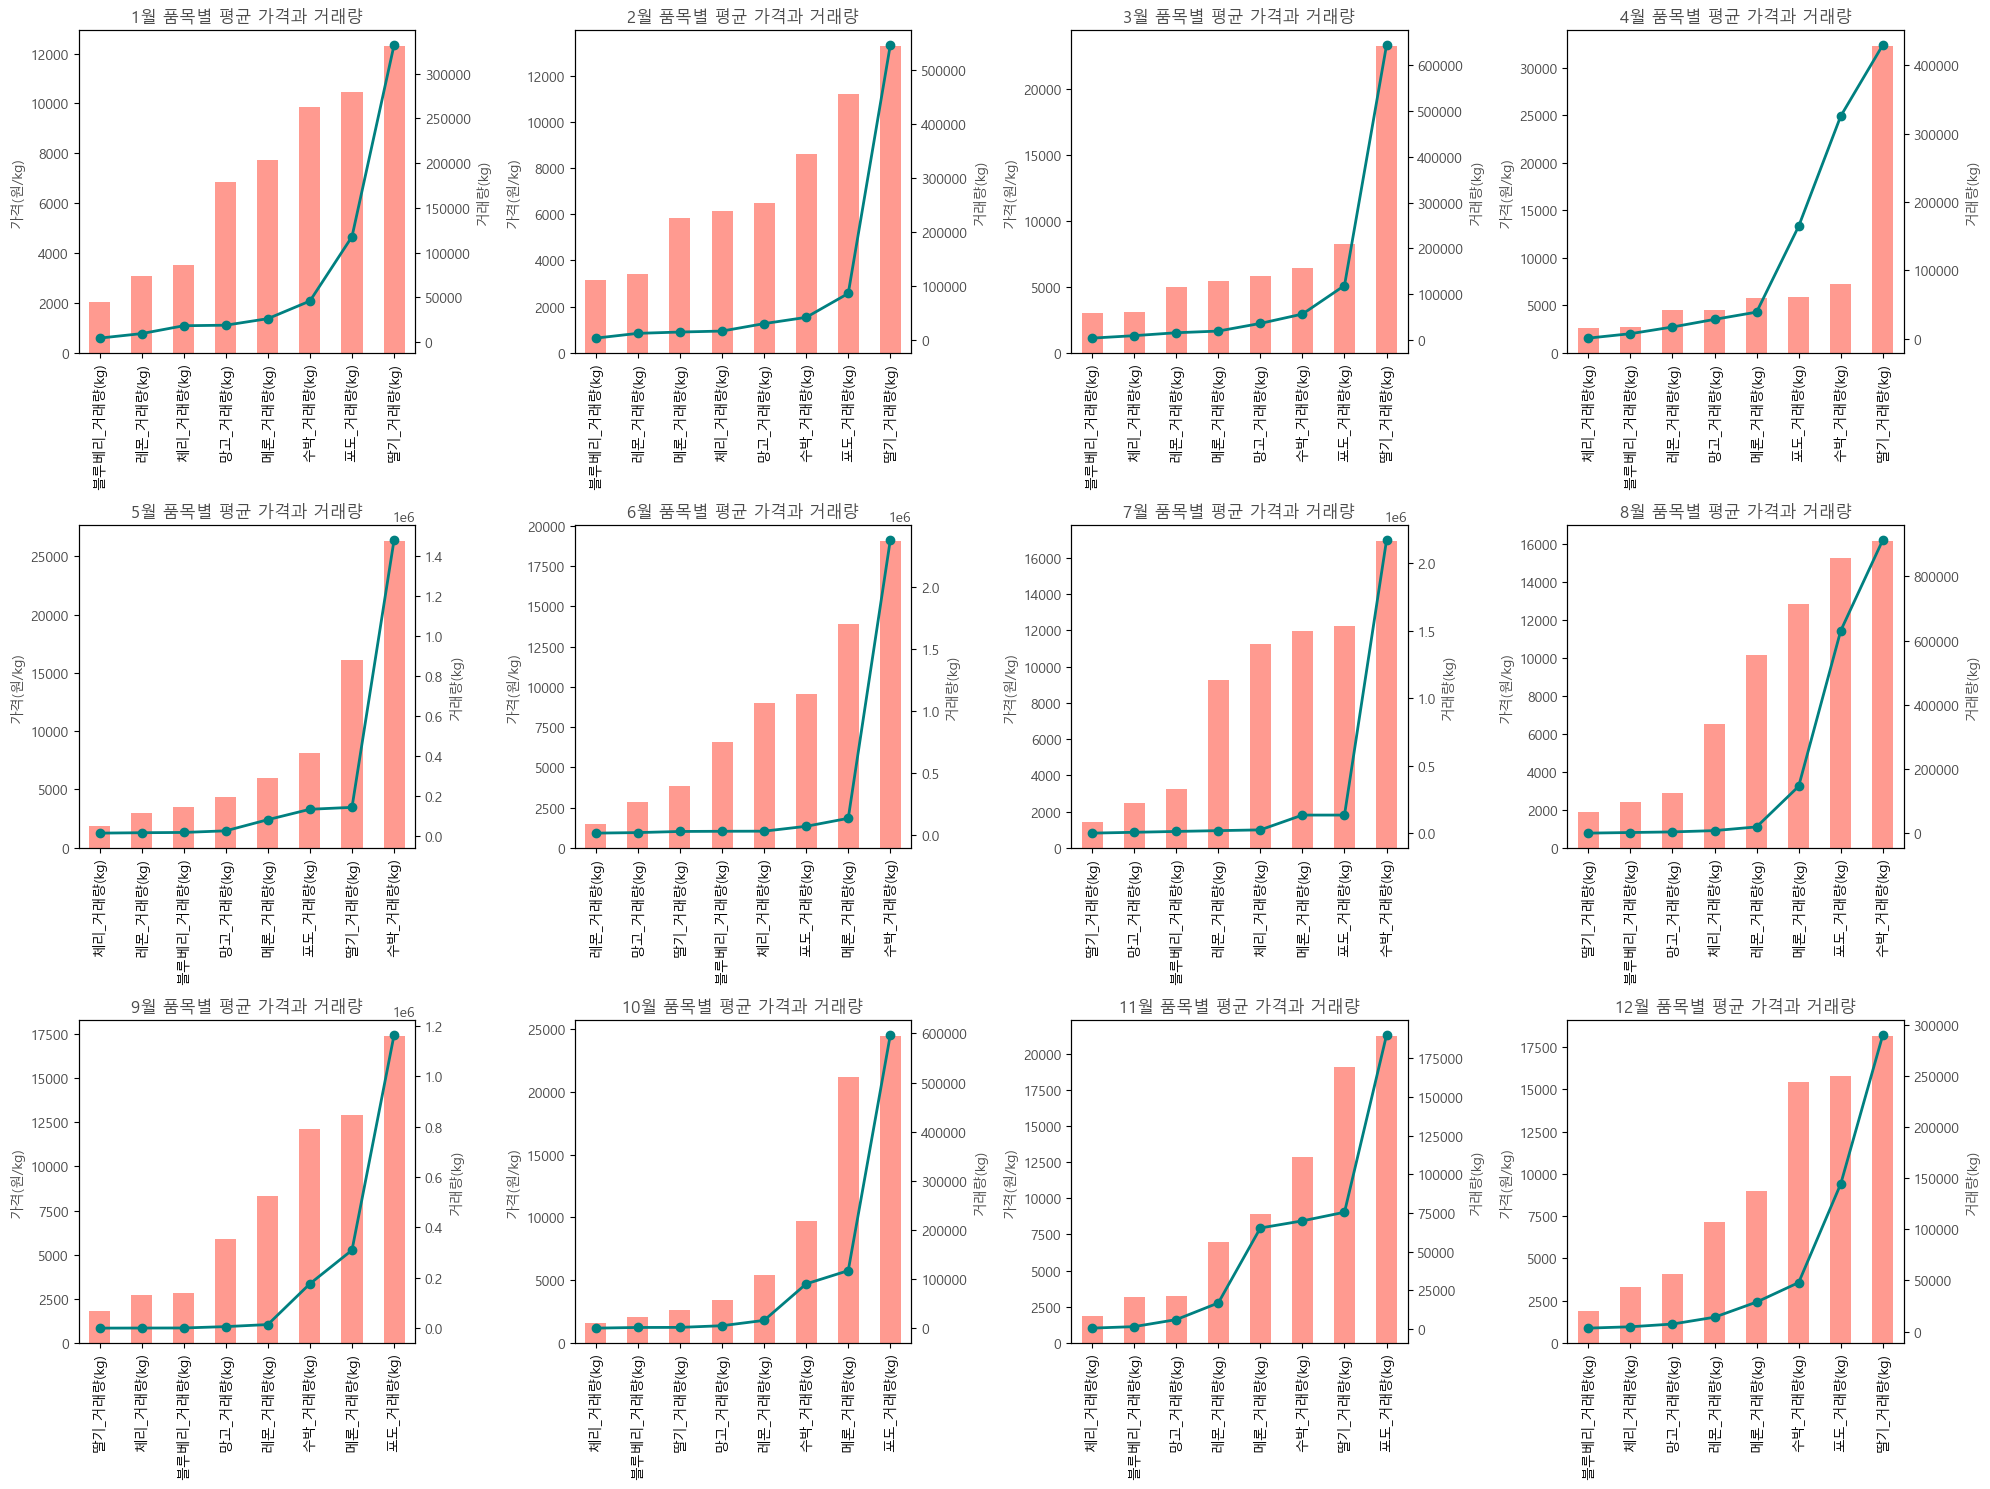

In [35]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for month in range(1, 13):
    ax1 = axes[month-1]  # 가격
    ax2 = ax1.twinx()    # 거래량

    df_monthly_means.loc[month, price_cols].sort_values().plot(kind='bar', ax=ax1, color='#FF6F61', alpha=0.7)
    ax1.set_ylabel('가격(원/kg)', color='#4B4B4B')
    ax1.tick_params(axis='y', labelcolor='#4B4B4B')

    df_monthly_means.loc[month, qty_cols].sort_values().plot(kind='line', ax=ax2, color='#008080', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('거래량(kg)', color='#4B4B4B')
    ax2.tick_params(axis='y', labelcolor='#4B4B4B')

    ax1.set_title(f'{month}월 품목별 평균 가격과 거래량', color='#4B4B4B')

plt.tight_layout()
plt.show()



- 품목별 년도별 거래량과 가격

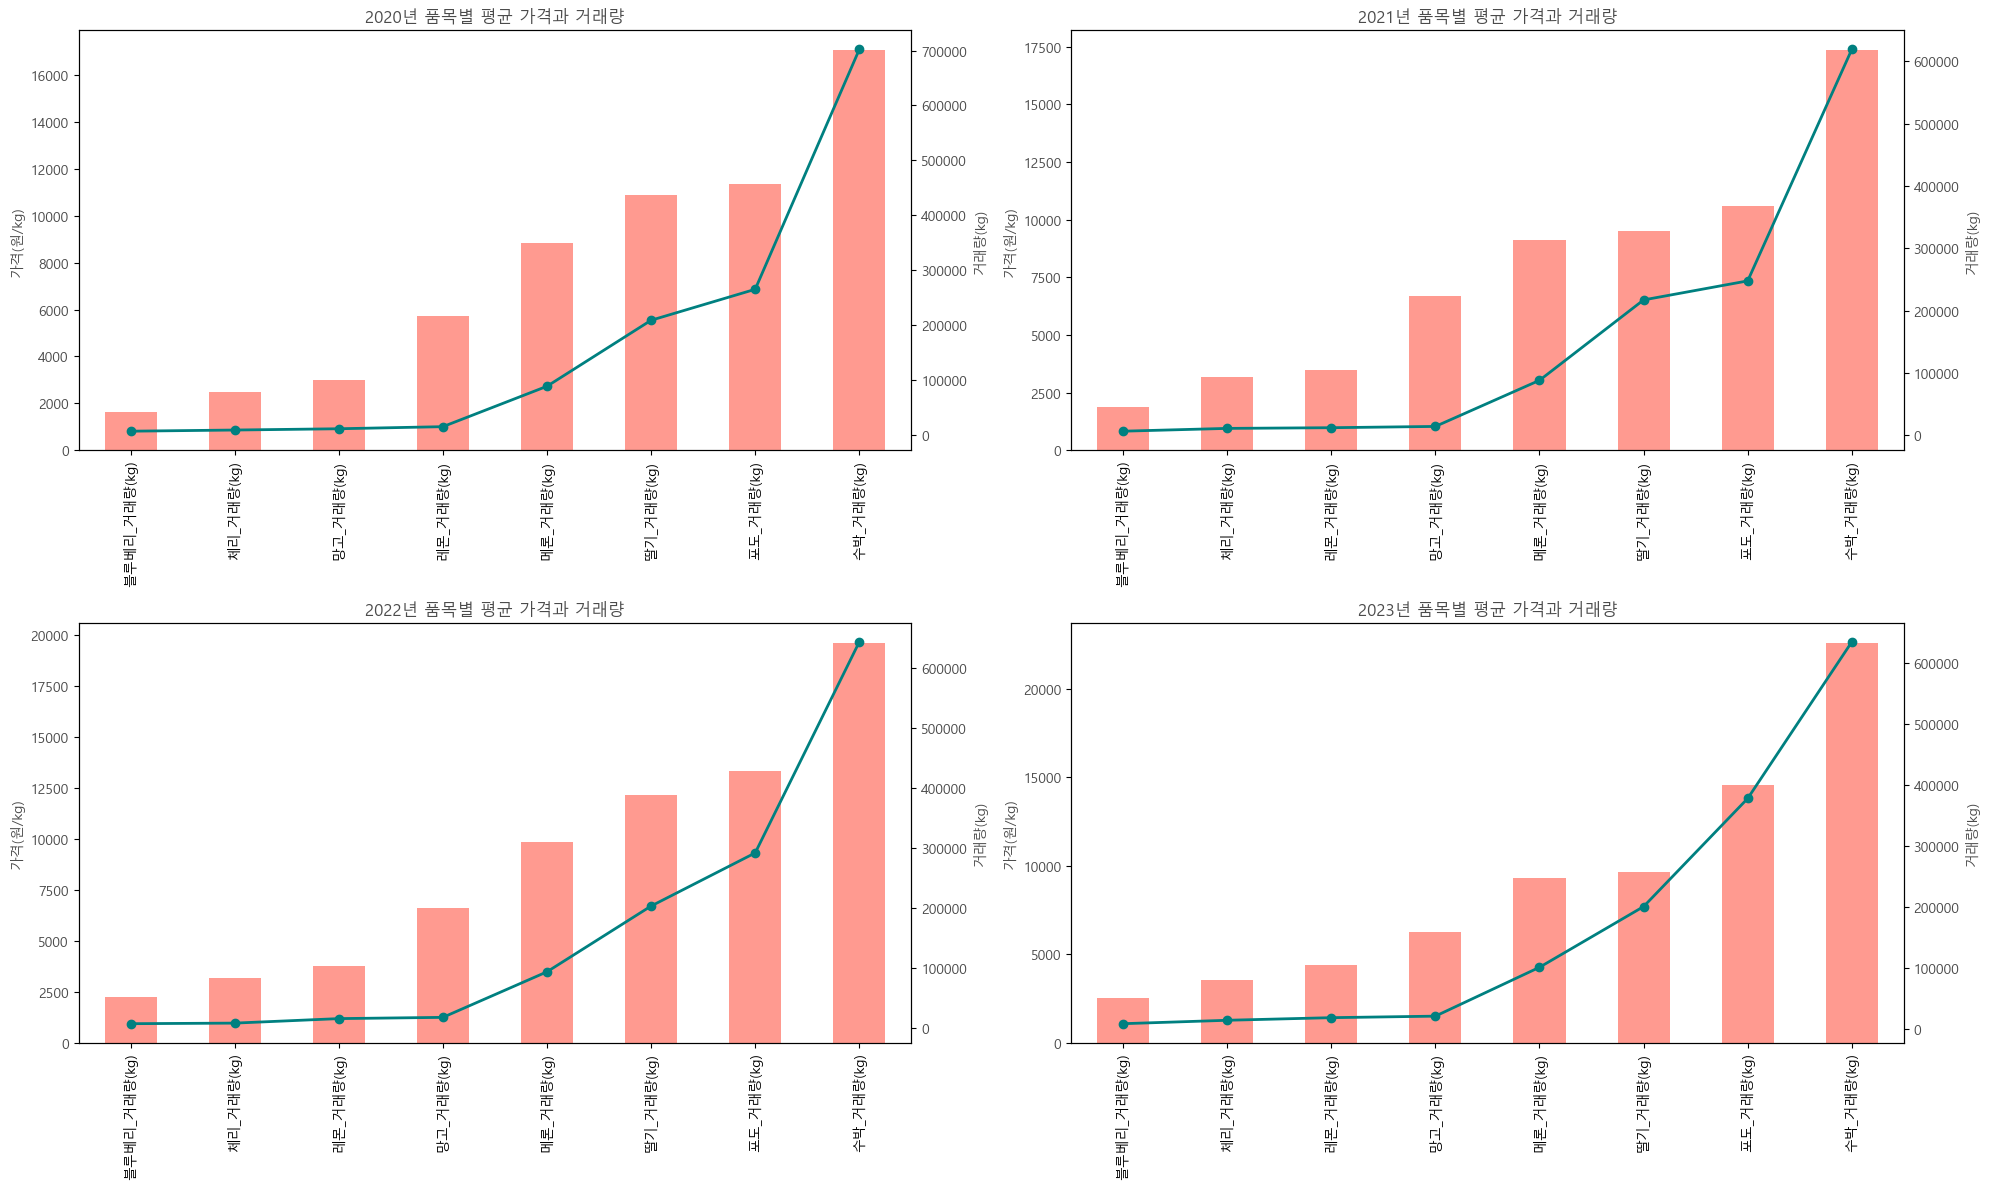

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12)) 
axes = axes.flatten()

for i, year in enumerate(years):
    ax1 = axes[i]      # 가격
    ax2 = ax1.twinx()  # 거래량

    df_means[year][price_cols].sort_values().plot(kind='bar', ax=ax1, color='#FF6F61', alpha=0.7)
    ax1.set_ylabel('가격(원/kg)', color='#4B4B4B')
    ax1.tick_params(axis='y', labelcolor='#4B4B4B')

    df_means[year][qty_cols].sort_values().plot(kind='line', ax=ax2, color='#008080', marker='o', linestyle='-', linewidth=2)
    ax2.set_ylabel('거래량(kg)', color='#4B4B4B')
    ax2.tick_params(axis='y', labelcolor='#4B4B4B')

    ax1.set_title(f'{year}년 품목별 평균 가격과 거래량', color='#4B4B4B')

plt.tight_layout()
plt.show()

In [ ]:
# 'date'는 인덱스에 있으므로, 인덱스에서 월 정보를 추출
df_monthly['month'] = df_monthly.index.month

# 월별 평균 계산
df_monthly_means = df_monthly.groupby('month').mean()

# '거래량'과 '가격'에 해당하는 컬럼을 선택
qty_cols = [col for col in df_monthly_means.columns if '거래량' in col]
price_cols = [col for col in df_monthly_means.columns if '가격' in col]

# 막대 그래프 위에 값을 표시하는 함수
def add_values_on_bars(ax, spacing=5):
    for bar in ax.patches:
        _x = bar.get_width()  # 막대의 너비
        _y = bar.get_y() + bar.get_height() / 2  # 막대의 중간 지점
        value = f'{bar.get_width():,.0f}'  # 표시할 값 포맷
        ax.text(_x + spacing, _y, value, va='center')  # 값을 그래프 위에 추가


In [ ]:
def calculate_yearly_mean(df, year):
    # 인덱스에서 연도 추출
    df_year = df[df.index.year == year]
    return df_year.mean()

# 연도 리스트
years = [2020, 2021, 2022, 2023]

# 연도별 평균 계산
df_means = {year: calculate_yearly_mean(df_monthly, year) for year in years}

# '거래량'과 '가격' 컬럼 구분
qty_cols = [col for col in df_means[2020].index if '거래량' in col]
price_cols = [col for col in df_means[2020].index if '가격' in col]

# 막대그래프에 값을 표시하는 함수
def add_values_on_bars(ax, spacing=5):
    for bar in ax.patches:
        _x = bar.get_x() + bar.get_width()
        _y = bar.get_y() + bar.get_height() / 2
        value = f'{bar.get_width():,.0f}'
        ax.text(_x + spacing, _y, value, va='center')

# 예시 출력 확인
print(df_means)
